In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
data = pd.read_csv('Mall_Customers.csv')

In [48]:
# Display the first few rows of the dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [49]:
# Step 2: Perform exploratory data analysis (EDA)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [50]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


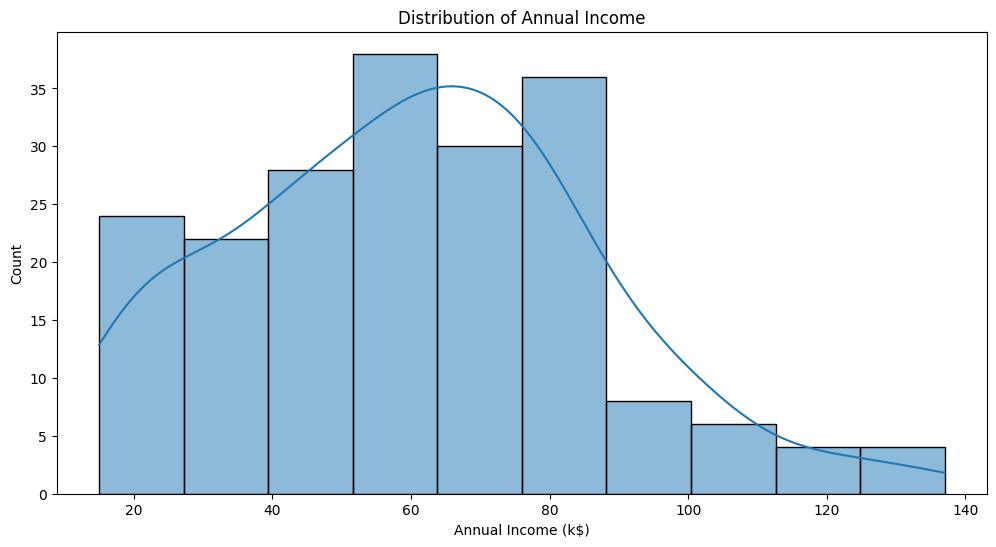

In [51]:
# Visualize the data distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

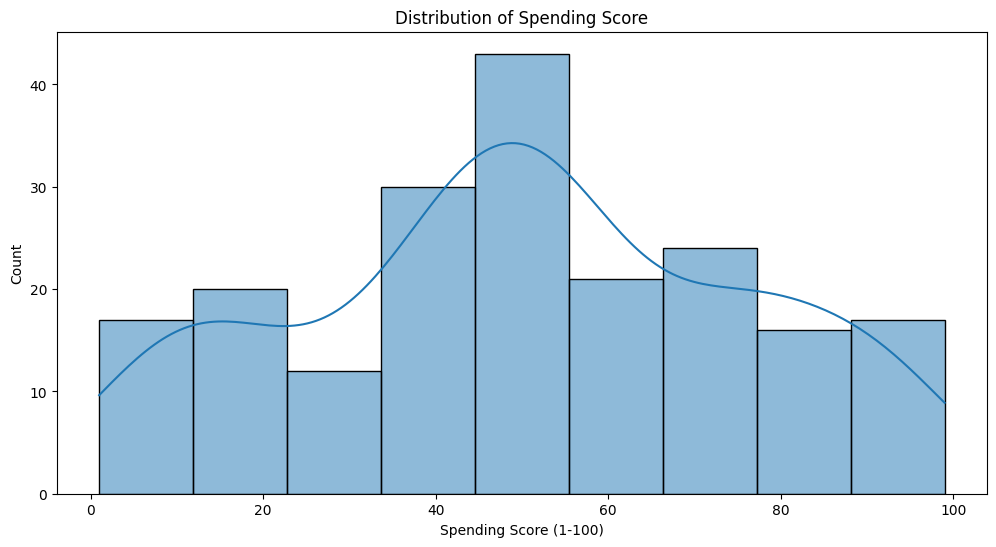

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.show()

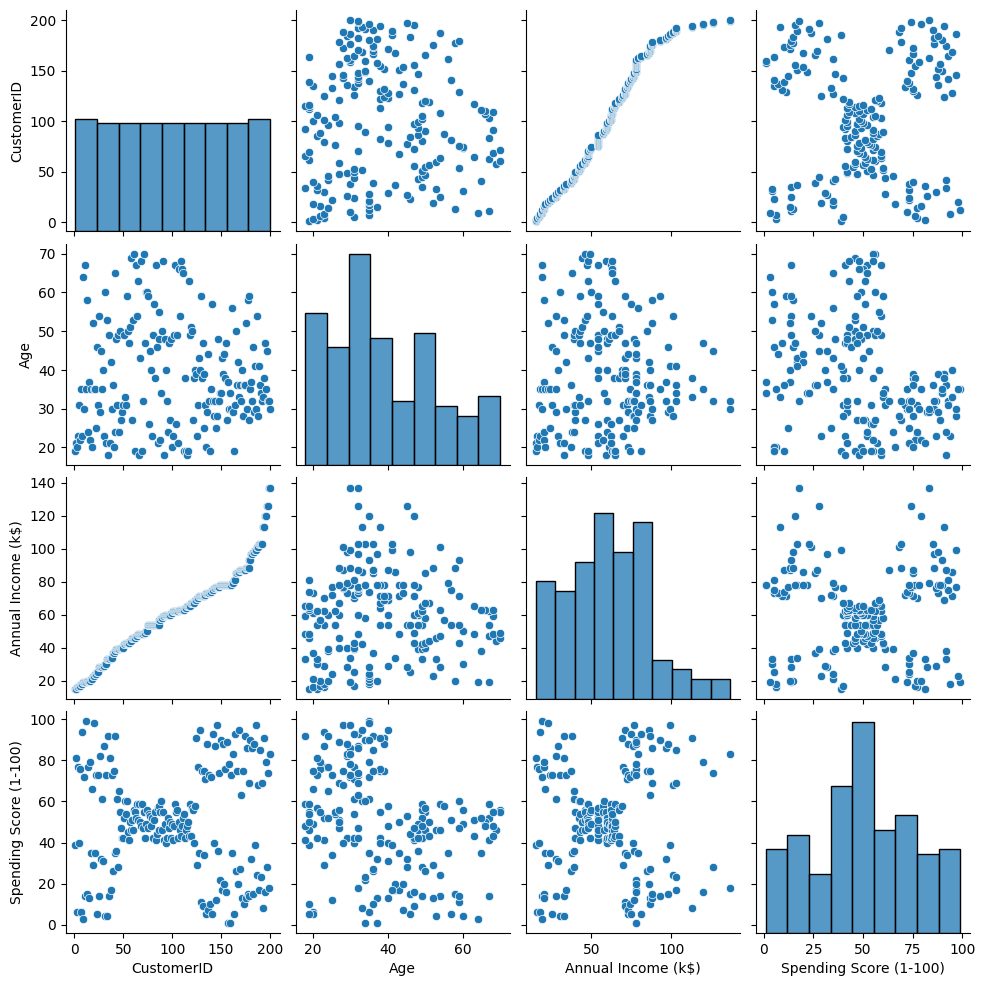

In [53]:
# Pairplot to see the relationships
sns.pairplot(data)
plt.show()

In [54]:
# Drop the CustomerID as it's not needed for clustering
data = data.drop(columns=['CustomerID'])

In [55]:
# Step 3: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [56]:
# If there are missing values, we can handle them here
data = data.dropna()

In [57]:
#Preprocess data
# Convert categorical data to numeric (Gender)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [58]:
# Select relevant features for clustering
# For this example, let's assume we are using 'Annual Income (k$)' and 'Spending Score (1-100)'
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [59]:
# Perform PCA for visualization purposes (optional)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)


In [60]:
# Step 4: Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

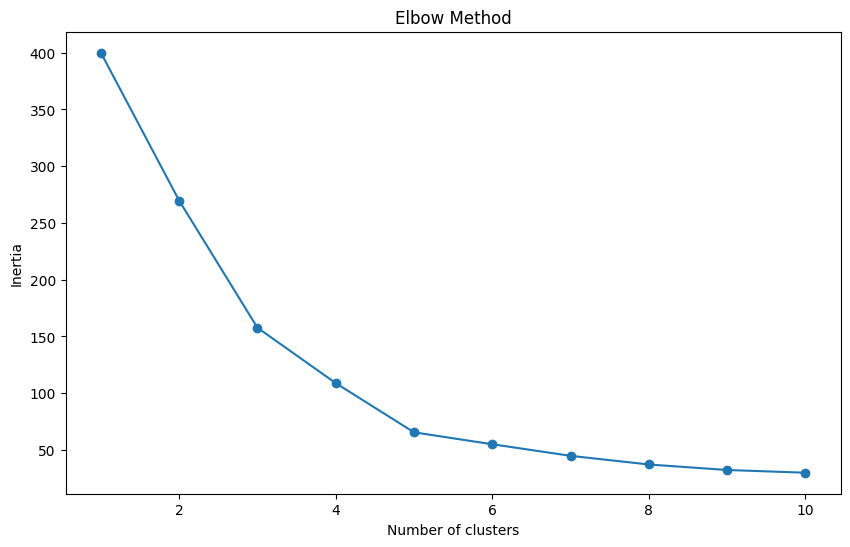

In [61]:
# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [62]:
# Based on the elbow plot, let's choose the optimal number of clusters, say 5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Step 5: Add the cluster labels to the original data
data['Cluster'] = clusters

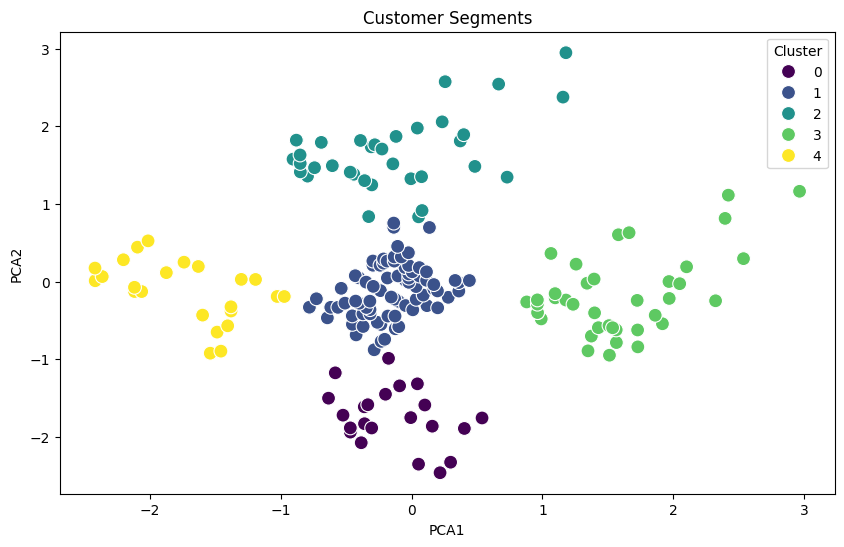

In [63]:
# From the plot, we choose the optimal number of clusters
optimal_clusters = 5

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# PCA data for visualization
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.show()


In [64]:
# Step 7: Interpret the clusters
print(data.groupby('Cluster').mean())

# Save the clustered data to a new CSV file
data.to_csv('customer_segments.csv', index=False)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.590909  25.272727           25.727273               79.363636
1        0.592593  42.716049           55.296296               49.518519
2        0.457143  41.114286           88.200000               17.114286
3        0.538462  32.692308           86.538462               82.128205
4        0.608696  45.217391           26.304348               20.913043
